### Normalização

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# biblioteca para fazer a normalização
from sklearn.preprocessing import MinMaxScaler


In [2]:
# carregando o arquivo
df_original = pd.read_csv("D:\\Users\\tiago\\Downloads\\Fase 1\\Fase 1\\Dados inicial\\dados.csv", sep = ";")

df_original

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,62473,9029.0,53952.0,45770,"43731,1",2512,113.0,29403,80609.0,63724.0,"71,19",158,158,158,1
1,98373,56367.0,-1.0,22473,"68861,1",563,139.0,114136,129245.0,33859.0,"87,57",190,155,119,1
2,787,93203.0,109460.0,105912,"550,9",3258,127.0,11412,300882.0,326.0,"80,01",145,120,72,1
3,4590,76386.0,23087.0,46211,3213,2276,140.0,80428,71589.0,533.0,"88,2",154,137,109,1
4,84631,30822.0,25158.0,12022,"59241,7",2167,143.0,43401,22692.0,88707.0,"90,09",193,193,193,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,739,10052.0,13710.0,19704,"517,3",6041,118.0,1669,47897.0,680.0,"74,34",88,121,61,0
158,2418,5151.0,8552.0,19830,"1692,6",14374,108.0,1921,37343.0,11061.0,"68,04",77,87,91,0
159,5736,7147.0,16064.0,13879,"4015,2",7682,120.0,3391,NaN,3703.0,"75,6",105,128,66,0
160,5600,13967.0,13290.0,13161,3920,4307,130.0,81,50146.0,98.0,"81,9",121,144,56,0


In [3]:
# nomeando as colunas
df_original.columns = ['V1','V2', 'V3',	'V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15']

# visualizando as primeiras linhas do DataFrame
df_original.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,62473,9029.0,53952.0,45770,"43731,1",2512,113.0,29403,80609.0,63724.0,"71,19",158,158,158,1
1,98373,56367.0,-1.0,22473,"68861,1",563,139.0,114136,129245.0,33859.0,"87,57",190,155,119,1
2,787,93203.0,109460.0,105912,"550,9",3258,127.0,11412,300882.0,326.0,"80,01",145,120,72,1
3,4590,76386.0,23087.0,46211,3213,2276,140.0,80428,71589.0,533.0,"88,2",154,137,109,1
4,84631,30822.0,25158.0,12022,"59241,7",2167,143.0,43401,22692.0,88707.0,"90,09",193,193,193,1


In [4]:
# colocando ponto no lugar de virgulas
df_original = df_original.astype(str)
df_original = df_original.apply(lambda x: x.str.replace(',', '.'))


df_original = df_original.astype(float)

# visualizando as primeiras linhas do DataFrame
df_original

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,62473.0,9029.0,53952.0,45770.0,43731.1,2512.0,113.0,29403.0,80609.0,63724.0,71.19,158.0,158.0,158.0,1.0
1,98373.0,56367.0,-1.0,22473.0,68861.1,563.0,139.0,114136.0,129245.0,33859.0,87.57,190.0,155.0,119.0,1.0
2,787.0,93203.0,109460.0,105912.0,550.9,3258.0,127.0,11412.0,300882.0,326.0,80.01,145.0,120.0,72.0,1.0
3,4590.0,76386.0,23087.0,46211.0,3213.0,2276.0,140.0,80428.0,71589.0,533.0,88.20,154.0,137.0,109.0,1.0
4,84631.0,30822.0,25158.0,12022.0,59241.7,2167.0,143.0,43401.0,22692.0,88707.0,90.09,193.0,193.0,193.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,739.0,10052.0,13710.0,19704.0,517.3,6041.0,118.0,1669.0,47897.0,680.0,74.34,88.0,121.0,61.0,0.0
158,2418.0,5151.0,8552.0,19830.0,1692.6,14374.0,108.0,1921.0,37343.0,11061.0,68.04,77.0,87.0,91.0,0.0
159,5736.0,7147.0,16064.0,13879.0,4015.2,7682.0,120.0,3391.0,NaN,3703.0,75.60,105.0,128.0,66.0,0.0
160,5600.0,13967.0,13290.0,13161.0,3920.0,4307.0,130.0,81.0,50146.0,98.0,81.90,121.0,144.0,56.0,0.0


In [5]:
# Encontrando valores negativos
valores_negativos = df_original < 0

# Calculando a média de cada coluna
medias_colunas = df_original.mean()

# Substituindo valores negativos pela média da coluna correspondente
df_original = df_original.where(~valores_negativos, medias_colunas, axis=1)

# Visualizando o DataFrame tratado
df_original

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,62473.0,9029.0,53952.00000,45770.0,43731.1,2512.0,113.0,29403.0,80609.0,63724.0,71.19,158.0,158.0,158.0,1.0
1,98373.0,56367.0,45416.56875,22473.0,68861.1,563.0,139.0,114136.0,129245.0,33859.0,87.57,190.0,155.0,119.0,1.0
2,787.0,93203.0,109460.00000,105912.0,550.9,3258.0,127.0,11412.0,300882.0,326.0,80.01,145.0,120.0,72.0,1.0
3,4590.0,76386.0,23087.00000,46211.0,3213.0,2276.0,140.0,80428.0,71589.0,533.0,88.20,154.0,137.0,109.0,1.0
4,84631.0,30822.0,25158.00000,12022.0,59241.7,2167.0,143.0,43401.0,22692.0,88707.0,90.09,193.0,193.0,193.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,739.0,10052.0,13710.00000,19704.0,517.3,6041.0,118.0,1669.0,47897.0,680.0,74.34,88.0,121.0,61.0,0.0
158,2418.0,5151.0,8552.00000,19830.0,1692.6,14374.0,108.0,1921.0,37343.0,11061.0,68.04,77.0,87.0,91.0,0.0
159,5736.0,7147.0,16064.00000,13879.0,4015.2,7682.0,120.0,3391.0,NaN,3703.0,75.60,105.0,128.0,66.0,0.0
160,5600.0,13967.0,13290.00000,13161.0,3920.0,4307.0,130.0,81.0,50146.0,98.0,81.90,121.0,144.0,56.0,0.0


In [6]:
# pegando dados vazios
colunas_nan = df_original.columns[df_original.isna().any()].tolist()

# Calculando a média de cada coluna
medias_colunas = df_original.mean()

# Substituindo valores vazios (NaN) pela média da coluna correspondente
df_original[colunas_nan] = df_original[colunas_nan].fillna(medias_colunas)

# Visualizando o DataFrame tratado
df_original

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,62473.0,9029.0,53952.00000,45770.0,43731.1,2512.0,113.0,29403.0,80609.000000,63724.0,71.19,158.0,158.0,158.0,1.0
1,98373.0,56367.0,45416.56875,22473.0,68861.1,563.0,139.0,114136.0,129245.000000,33859.0,87.57,190.0,155.0,119.0,1.0
2,787.0,93203.0,109460.00000,105912.0,550.9,3258.0,127.0,11412.0,300882.000000,326.0,80.01,145.0,120.0,72.0,1.0
3,4590.0,76386.0,23087.00000,46211.0,3213.0,2276.0,140.0,80428.0,71589.000000,533.0,88.20,154.0,137.0,109.0,1.0
4,84631.0,30822.0,25158.00000,12022.0,59241.7,2167.0,143.0,43401.0,22692.000000,88707.0,90.09,193.0,193.0,193.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,739.0,10052.0,13710.00000,19704.0,517.3,6041.0,118.0,1669.0,47897.000000,680.0,74.34,88.0,121.0,61.0,0.0
158,2418.0,5151.0,8552.00000,19830.0,1692.6,14374.0,108.0,1921.0,37343.000000,11061.0,68.04,77.0,87.0,91.0,0.0
159,5736.0,7147.0,16064.00000,13879.0,4015.2,7682.0,120.0,3391.0,172412.348021,3703.0,75.60,105.0,128.0,66.0,0.0
160,5600.0,13967.0,13290.00000,13161.0,3920.0,4307.0,130.0,81.0,50146.000000,98.0,81.90,121.0,144.0,56.0,0.0


In [7]:
# Visualizando novamente o DataFrame Original
df_original.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,62473.0,9029.0,53952.00000,45770.0,43731.1,2512.0,113.0,29403.0,80609.0,63724.0,71.19,158.0,158.0,158.0,1.0
1,98373.0,56367.0,45416.56875,22473.0,68861.1,563.0,139.0,114136.0,129245.0,33859.0,87.57,190.0,155.0,119.0,1.0
2,787.0,93203.0,109460.00000,105912.0,550.9,3258.0,127.0,11412.0,300882.0,326.0,80.01,145.0,120.0,72.0,1.0
3,4590.0,76386.0,23087.00000,46211.0,3213.0,2276.0,140.0,80428.0,71589.0,533.0,88.20,154.0,137.0,109.0,1.0
4,84631.0,30822.0,25158.00000,12022.0,59241.7,2167.0,143.0,43401.0,22692.0,88707.0,90.09,193.0,193.0,193.0,1.0


In [8]:
# Criando um objeto para NORMALIZAR os dados
obj_normalizacao = MinMaxScaler().fit(df_original)

In [9]:
# Aplicando a NORMALIZAÇÃO
df_normalizado = obj_normalizacao.transform(df_original)

In [10]:
# Visualizando os dados normalizados
df_normalizado

array([[0.10678908, 0.0098011 , 0.16184861, ..., 0.6       , 0.6359447 ,
        1.        ],
       [0.16815524, 0.06153091, 0.13600058, ..., 0.58536585, 0.4562212 ,
        1.        ],
       [0.00134527, 0.10178439, 0.32994464, ..., 0.41463415, 0.23963134,
        1.        ],
       ...,
       [0.00980491, 0.0077445 , 0.04711159, ..., 0.45365854, 0.21198157,
        0.        ],
       [0.00957244, 0.01519723, 0.03871103, ..., 0.53170732, 0.16589862,
        0.        ],
       [0.00835708, 0.00635777, 0.04588512, ..., 0.45365854, 0.25345622,
        0.        ]])

In [11]:
# transformando para DataFrame e nomeando as colunas
df_normalizado = pd.DataFrame(df_normalizado)
df_normalizado.columns = ['V1','V2', 'V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15']

# visualizando os dados NORMALIZADOS
df_normalizado.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,0.106789,0.009801,0.161849,0.108258,0.106789,0.016963,0.397059,0.052636,0.107628,0.067169,0.733766,0.000067,0.600000,0.635945,1.0
1,0.168155,0.061531,0.136001,0.053009,0.168155,0.003802,0.779412,0.204565,0.173466,0.035690,0.902597,0.000083,0.585366,0.456221,1.0
2,0.001345,0.101784,0.329945,0.250887,0.001345,0.022000,0.602941,0.020378,0.405808,0.000344,0.824675,0.000060,0.414634,0.239631,1.0
3,0.007846,0.083407,0.068379,0.109304,0.007846,0.015369,0.794118,0.144125,0.095417,0.000562,0.909091,0.000065,0.497561,0.410138,1.0
4,0.144665,0.033616,0.074651,0.028224,0.144665,0.014633,0.838235,0.077735,0.029226,0.093503,0.928571,0.000084,0.770732,0.797235,1.0


In [12]:
#fazendo correlação das variaveis
df_normalizado.corr()

df_normalizado.corr().to_csv('dados_correlacionados.csv', sep=';')

In [13]:
# Classe igual a 0
df_classe_0 = df_normalizado[df_normalizado['V15'] == 0]

# Média e desvio padrão para a classe 0
media_classe0 = df_classe_0.mean(axis=0)
desvio_padrao_classe0 = df_classe_0.std(axis=0)

# Classe igual a 1
df_classe_1 = df_normalizado[df_normalizado['V15'] == 1]

# Média e desvio padrão para a classe 1
media_classe1 = df_classe_1.mean(axis=0)
desvio_padrao_classe1 = df_classe_1.std(axis=0)

In [14]:
# Criar DataFrame descritivo para ambas as classes
descritivo_classes = pd.DataFrame({'Media Classe 0': media_classe0, 'Media Classe 1': media_classe1,
                                   'Desvio Padrao Classe 0': desvio_padrao_classe0, 'Desvio Padrao Classe 1': desvio_padrao_classe1})

descritivo_classes.to_csv('estatistica_classes.csv', sep=';', float_format='%.6f')

# visualizando DataFrame descritivo
descritivo_classes.head()

,Media Classe 0,Media Classe 1,Desvio Padrao Classe 0,Desvio Padrao Classe 1
V1,0.032630,0.101122,0.018235,0.164319
V2,0.026799,0.044867,0.021513,0.100958
V3,0.106165,0.153523,0.085806,0.140262
V4,0.133764,0.172662,0.112458,0.158785
V5,0.032630,0.101122,0.018235,0.164319


In [15]:
#exportando descrição dos dados

# Arredondar os valores para 6 casas decimais
df_normalizado_rounded = df_normalizado.round(6)

df_normalizado_rounded.to_csv('dados_normalizadas.csv', sep=';')

In [16]:
#exportando descrição dos dados
df_normalizado.describe().to_csv('dados_estatisticos.csv', sep=';', float_format='%.6f')

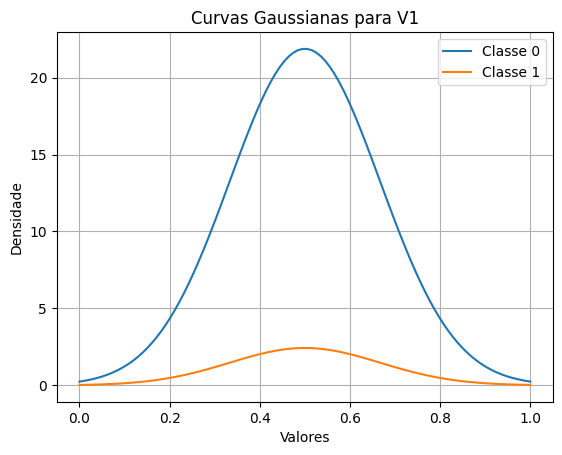

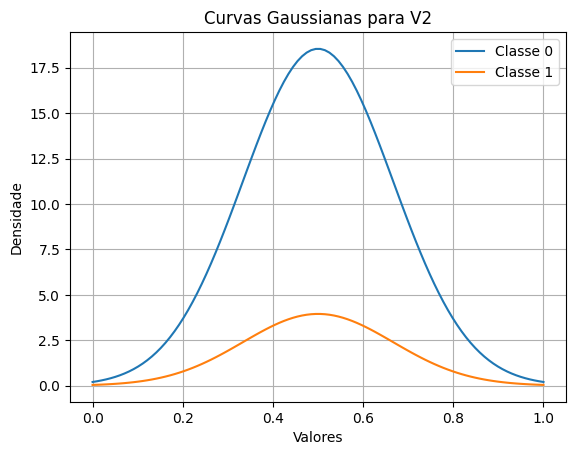

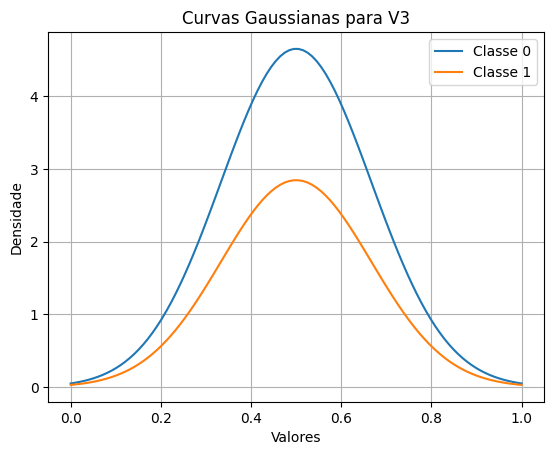

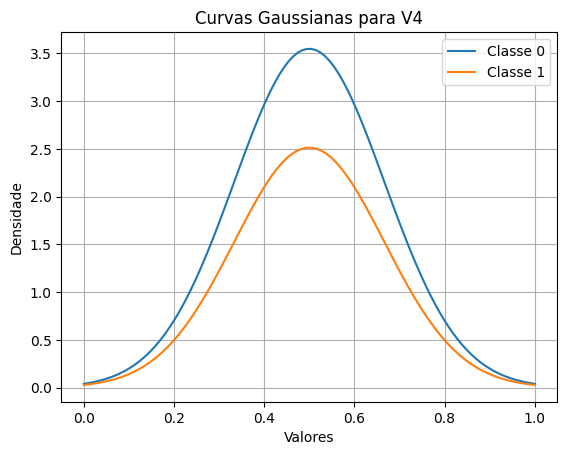

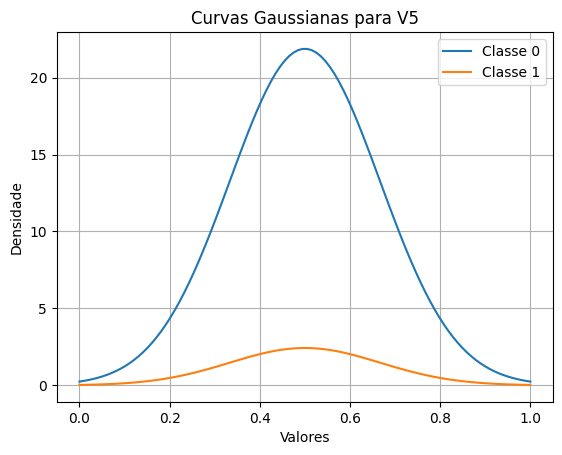

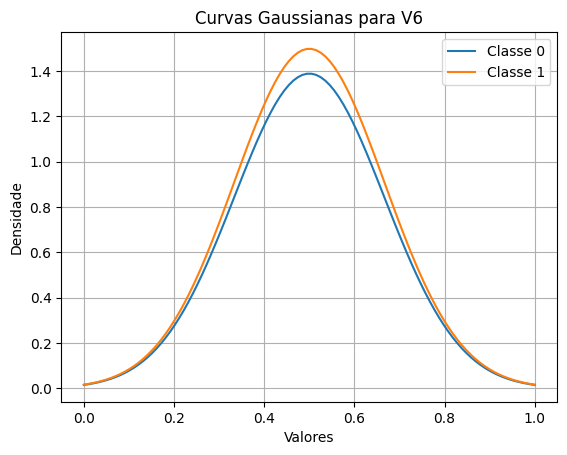

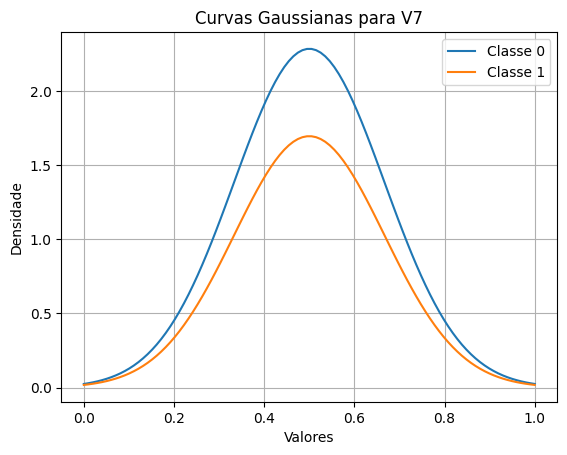

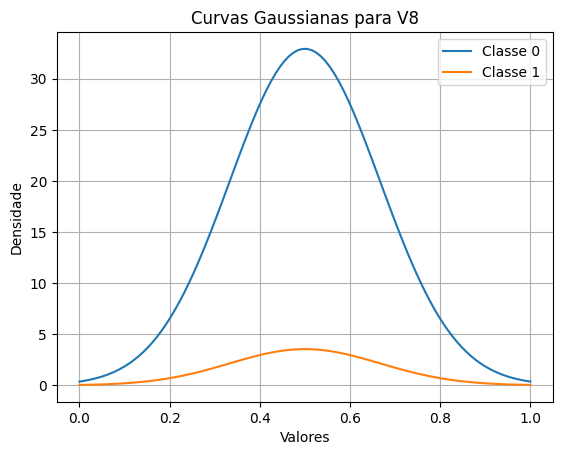

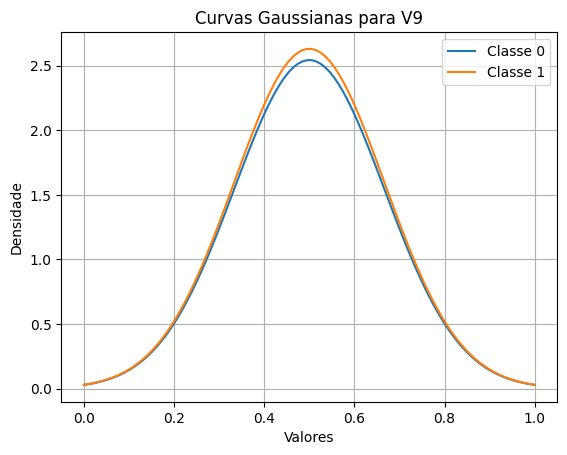

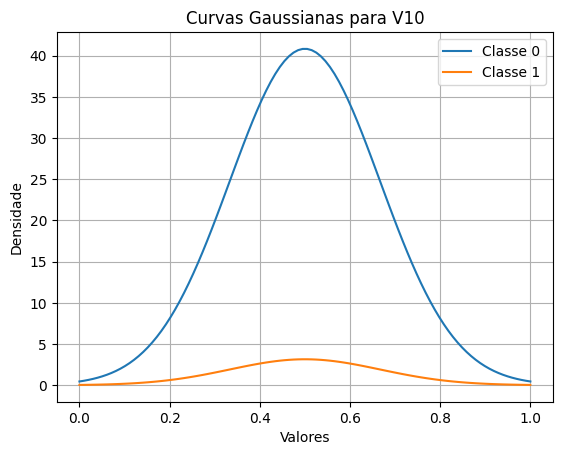

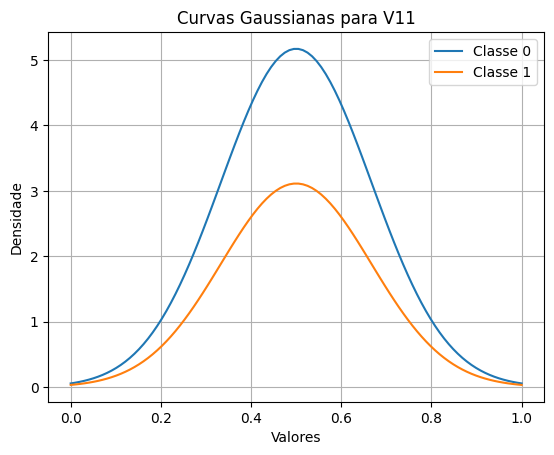

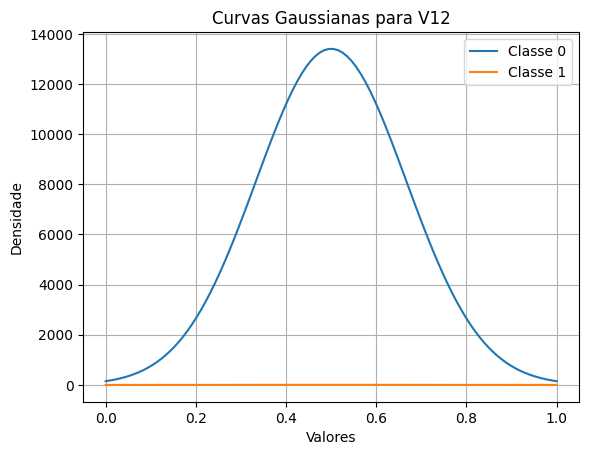

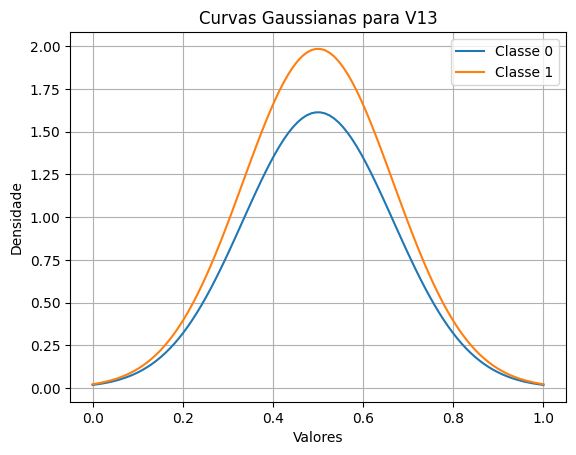

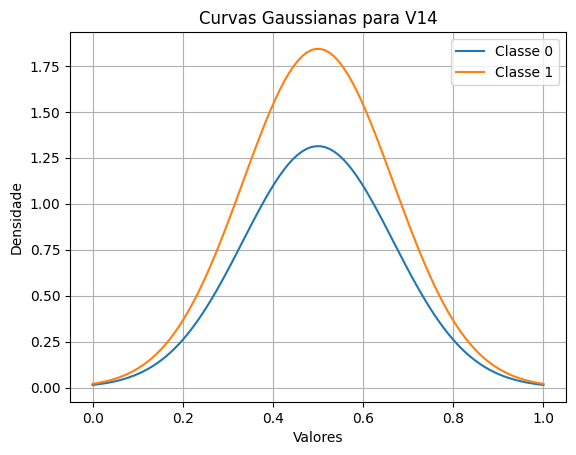

In [17]:
# Função para plotar a curva gaussiana
def plot_gaussiana(media, desvio_padrao, label):
    x = np.linspace(media - 3*desvio_padrao, media + 3*desvio_padrao, 100)
    x_padronizado = (x - np.min(x)) / (np.max(x) - np.min(x))
    #MANDAR EMAIL PRA KUPAC


    y = (1 / (desvio_padrao * np.sqrt(2*np.pi))) * np.exp(-0.5*((x - media)/desvio_padrao)**2)
    plt.plot(x_padronizado, y, label=label)

# Separar os dados em classes 0 e 1
df_classe_0 = df_normalizado[df_normalizado['V15'] == 0]
df_classe_1 = df_normalizado[df_normalizado['V15'] == 1]

# Iterar pelas colunas de V1 a V14
for coluna in df_normalizado.columns[:-1]:
    # Calcular média e desvio padrão para a classe 0
    media_classe0 = df_classe_0[coluna].mean()
    desvio_padrao_classe0 = df_classe_0[coluna].std()
    
    # Calcular média e desvio padrão para a classe 1
    media_classe1 = df_classe_1[coluna].mean()
    desvio_padrao_classe1 = df_classe_1[coluna].std()
    
    # Plotar as curvas gaussianas para a coluna atual
    plt.figure()
    plot_gaussiana(media_classe0, desvio_padrao_classe0, 'Classe 0')
    plot_gaussiana(media_classe1, desvio_padrao_classe1, 'Classe 1')
    plt.xlabel('Valores')
    plt.ylabel('Densidade')
    plt.title(f'Curvas Gaussianas para {coluna}')
    plt.legend()
    plt.grid(True)
    plt.show()